In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('sold_flats_2020-09-30.csv', parse_dates=['date_sold'], date_format='%Y-%m-%d')

/tmp/ipykernel_42312/1186252275.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('sold_flats_2020-09-30.csv', parse_dates=['date_sold'], date_format='%Y-%m-%d')


In [3]:
dataset.shape

(71761, 38)

In [4]:
dataset.describe()

,id,city_id,district_id,street_id,price,date_sold,sold_price,metro_station_id,flat_on_floor,floor_num,...,area_kitchen,builder_id,levels_count,bathrooms_cnt,series_id,wall_id,loggia,ceiling_height,longitude,latitude
count,7.176100e+04,71761.000000,71761.000000,71761.000000,7.175100e+04,71761,7.162100e+04,71756.000000,71761.000000,71755.000000,...,71758.000000,71761.000000,71761.000000,40630.000000,71560.000000,71755.000000,71761.0,71761.000000,65190.000000,65190.000000
mean,1.050444e+06,145.716225,5944.203871,19914.021070,5.105253e+03,2016-06-04 06:52:10.090160384,1.118452e+04,13.962986,0.213013,5.002341,...,3.890242,20.567174,0.987389,1.836303,385.921940,24.482893,0.0,1.728359,67.655915,56.096918
min,8.666800e+04,23.000000,-1.000000,-1.000000,0.000000e+00,2014-01-03 00:00:00,0.000000e+00,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.233500e+05,23.000000,781.000000,1704.000000,1.680000e+03,2015-07-06 00:00:00,1.650000e+03,0.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,44.000000,11.000000,0.0,0.000000,60.581003,55.022510
50%,1.063860e+06,85.000000,2617.000000,5855.000000,2.300000e+03,2016-08-26 00:00:00,2.270000e+03,0.000000,0.000000,4.000000,...,0.000000,0.000000,1.000000,2.000000,49.000000,12.000000,0.0,2.500000,65.594948,57.105932
75%,1.451350e+06,184.000000,9434.000000,35066.000000,3.200000e+03,2017-06-16 00:00:00,3.125000e+03,0.000000,0.000000,7.000000,...,8.000000,0.000000,1.000000,2.000000,149.000000,12.000000,0.0,2.500000,73.409263,57.192562
max,1.947471e+06,1347.000000,44581.000000,152940.000000,8.400000e+06,2017-12-31 00:00:00,4.219500e+07,70388.000000,309.000000,27.000000,...,101.100000,3597.000000,3.000000,4.000000,2341.000000,412.000000,0.0,2500.000000,634.226370,633.813000
std,4.645742e+05,191.871648,6927.366017,23669.915644,8.034098e+04,NaN,3.166649e+05,633.300903,2.785098,3.593269,...,5.231731,168.303157,0.119082,0.594474,608.829097,45.066015,0.0,9.895911,20.057081,7.577124


In [5]:
# dataset.dtypes

<Axes: >

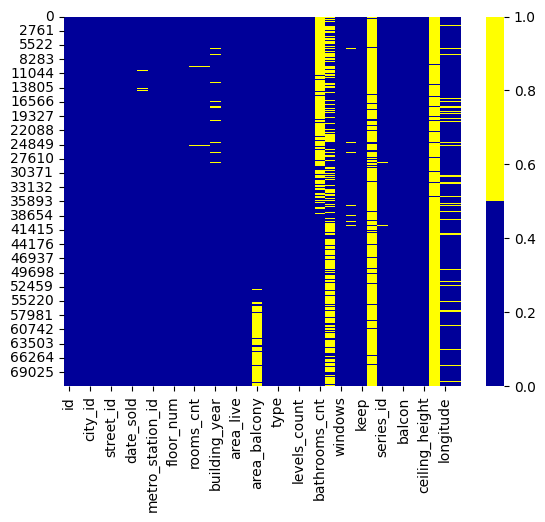

In [6]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(dataset[dataset.columns].isnull(), cmap=sns.color_palette(colours))

<Axes: >

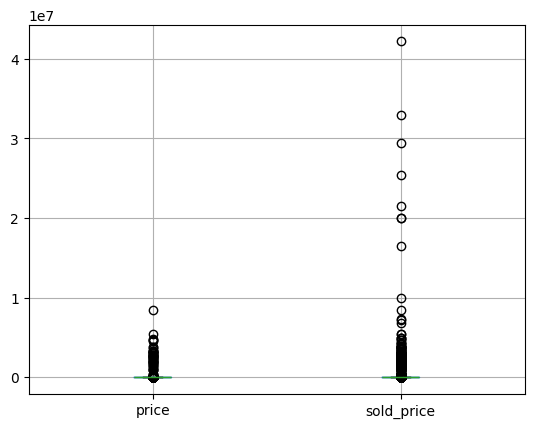

In [7]:
dataset.boxplot(column=['price', 'sold_price'])

In [8]:
# dataset = dataset.fillna(method='ffill')
# dataset.isnull().any()

In [9]:
# dataset['price'] = dataset['price'].fillna(dataset['price'].mean())
# dataset['price'].isnull().any()

In [10]:
# dataset['sold_price'] = dataset['sold_price'].fillna(dataset['price'])
dataset = dataset.dropna(subset=['sold_price', 'price'])
dataset['sold_price'].isnull().any()

False

<Axes: >

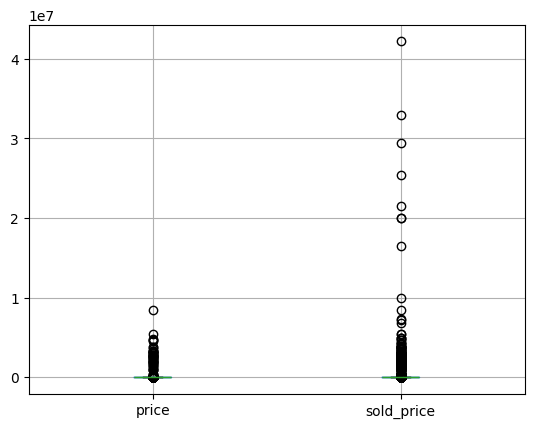

In [11]:
dataset.boxplot(column=['price', 'sold_price'])

<Axes: >

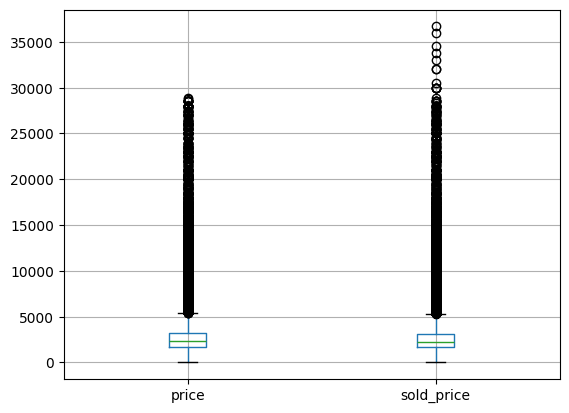

In [12]:
sold_price_q = dataset['sold_price'].quantile(0.99)
price_q = dataset['price'].quantile(0.99)
dataset = dataset[dataset['sold_price'] < sold_price_q]
dataset = dataset[dataset['price'] < price_q]
dataset.boxplot(column=['price', 'sold_price'])

In [13]:
dataset['area_total'] = dataset['area_total'].fillna(dataset['area_total'].mean())
dataset['area_total'].isnull().any()

False

In [14]:
dataset['floor_num'] = dataset['floor_num'].fillna(dataset['floor_num'].mean())
dataset['floor_num'].isnull().any()

False

In [15]:
dataset['rooms_cnt'] = dataset['rooms_cnt'].fillna(dataset['rooms_cnt'].mean())
dataset['rooms_cnt'].isnull().any()

False

In [16]:
X = dataset[
        ['city_id', 'district_id', 'street_id', 'price', 'area_total', 'floor_num', 'rooms_cnt']
    ]
Y = dataset['sold_price']

In [17]:
# plt.figure(figsize=(15,10))
# plt.tight_layout()
# sns.displot(dataset['sold_price'])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=0)

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [20]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
city_id,0.067161
district_id,-0.000564
street_id,0.000002
price,0.956345
area_total,0.552409
floor_num,3.441739
rooms_cnt,2.324211


In [21]:
Y_pred = regressor.predict(X_test)

In [26]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(50)
df1

,Actual,Predicted
0,1320.0,1324.225223
1,1050.0,1101.132199
2,6000.0,5818.752336
3,3500.0,3398.178056
4,4300.0,4356.889368
5,3200.0,3110.002981
6,2050.0,2004.714189
7,4580.0,4591.643809
8,3450.0,3429.169214
9,720.0,746.261875


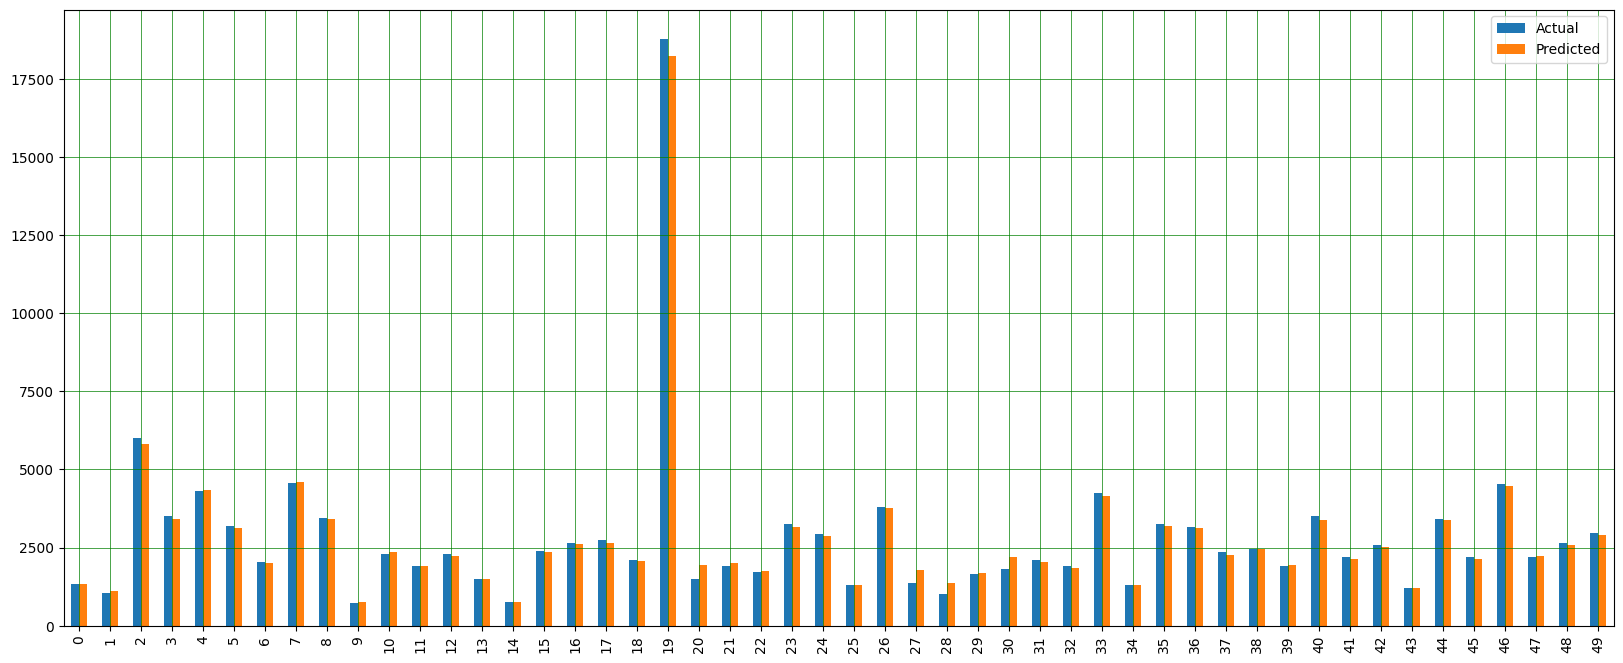

In [28]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()